In [ ]:
!pip install fbprophet

In [ ]:
!pip install pandas-datareader

In [ ]:
import pandas as pd
from fbprophet import Prophet
import plotly.express as px
import fbprophet.plot as fp
import plotly.io as pio
from datetime import datetime
import pandas_datareader.data as pdr
import numpy as np 
pio.renderers.default = "colab"

In [ ]:
#Getting doday's date
end = datetime.today()
#Start date set to seven years back
start = datetime(end.year-7,end.month,end.day)
#using fred to grab cryptocurrency (BTC coinbase) data
code = 'CBBTCUSD'
BTC = pdr.DataReader(code,'fred',start,end)
# print first 10 item to std I/O
BTC.head(10)

,CBBTCUSD
DATE,
2015-01-18,NaN
2015-01-19,225.51
2015-01-20,218.00
2015-01-21,225.51
2015-01-22,226.32
2015-01-23,235.00
2015-01-24,240.00
2015-01-25,254.53
2015-01-26,274.48


In [ ]:
BTC.to_csv('./CB_BTC_USD_fred.csv')

In [ ]:
from google.colab import files

In [ ]:
files.download('/content/CB_BTC_USD_fred.csv')

In [ ]:
uploaded = files.upload()

Saving BTC-USD_CB_7yrs_fred.csv to BTC-USD_CB_7yrs_fred (1).csv


In [ ]:
!ls

'BTC-USD_CB_7yrs_fred (1).csv'	 CB_BTC_USD_fred.csv
 BTC-USD_CB_7yrs_fred.csv	 sample_data


In [ ]:
df = pd.read_csv('/content/BTC-USD_CB_7yrs_fred.csv')

In [ ]:
df['y'] = np.log(df['y'])

In [ ]:
df.head(5)

,ds,y
0,1/19/2015,5.418365
1,1/20/2015,5.384495
2,1/21/2015,5.418365
3,1/22/2015,5.421950
4,1/23/2015,5.459586


In [ ]:
model = Prophet(daily_seasonality = True)
model.fit(df)

In [ ]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
2916,2023-01-13
2917,2023-01-14
2918,2023-01-15
2919,2023-01-16
2920,2023-01-17


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2916,2023-01-13,12.507218,9.284322,16.026360
2917,2023-01-14,12.517914,9.289310,15.998841
2918,2023-01-15,12.525544,9.268601,16.010074
2919,2023-01-16,12.537067,9.210592,16.045147
2920,2023-01-17,12.546497,9.334523,16.035838


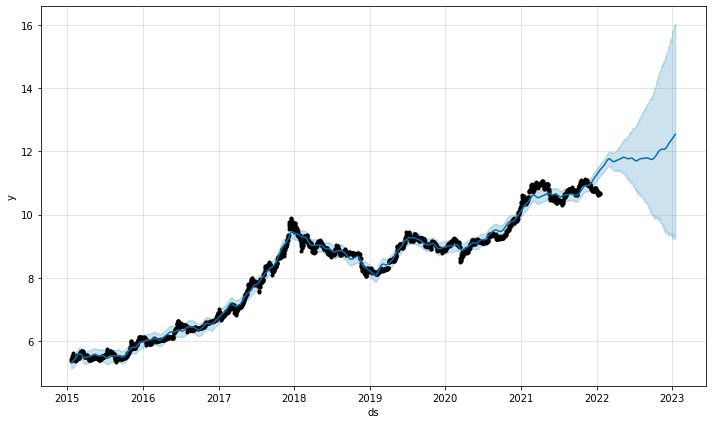

In [ ]:
model.plot(forecast);

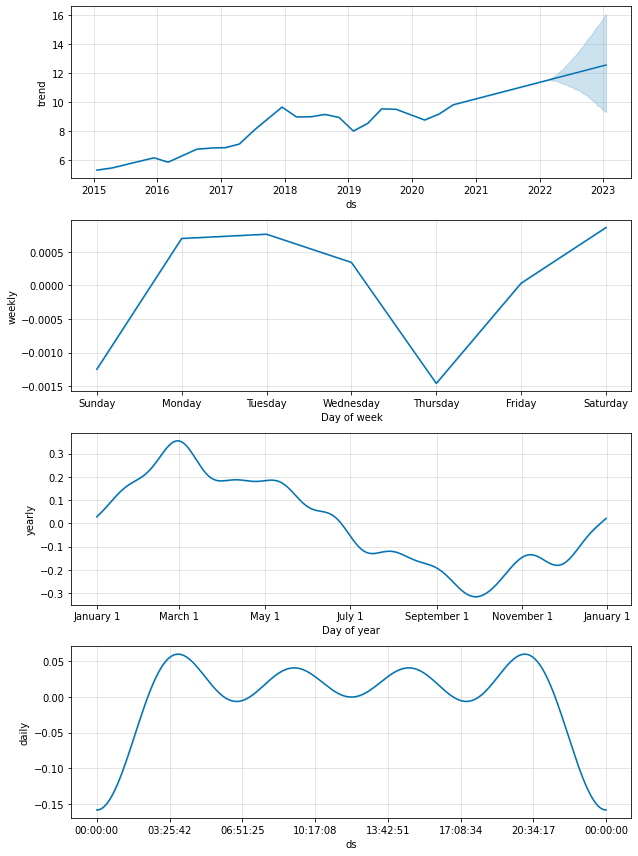

In [ ]:
model.plot_components(forecast);

In [ ]:
fig = fp.plot_plotly(model, forecast) 
fig.show()

In [ ]:
!nvidia-smi

Tue Jan 18 19:35:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------